### CNN preprocessing visualization

In this notebook, we will visualize the preprocessing steps we used for the CNN.

We will use the same data as in the previous notebook, but we will visualize the augmentations we used.

Import libraries

In [6]:
import sys
import os
import random

import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms.functional as TF

# These lines fix import errors:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.data import preprocessing
from src.training import config

Now we pick a random class directory and a random image in it.

In [7]:
sample_image_path = None

first_class_dir = os.path.join(config.RAW_DATA_DIR, random.choice(config.ALL_CLASSES))
if os.path.isdir(first_class_dir):
    image_files = [f for f in os.listdir(first_class_dir) if os.path.isfile(os.path.join(first_class_dir, f))]
    if image_files:
        sample_image_path = os.path.join(first_class_dir, random.choice(image_files))

print(f"Sample image path: {sample_image_path}")

Sample image path: /home3/s5209234/plant-disease-classification/src/training/../../data/raw/color/Pepper,_bell___healthy/95c8741a-b5a8-4e49-baad-2015bcaf5c3f___JR_HL 5811.JPG


Now we apply the preprocessing steps to the sample image and visualize the results.

Augmentation visualization:
Using train_transforms from src.data.preprocessing: Compose(
    Compose(
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
    RandomAffine(degrees=[0.0, 0.0], translate=(0.1, 0.1), scale=(0.9, 1.1), shear=[-5.0, 5.0])
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


NameError: name 'num_augmentations_to_show' is not defined

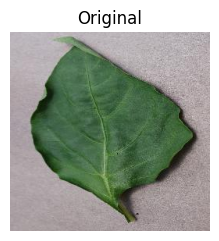

In [ ]:
img_pil = Image.open(sample_image_path).convert('RGB')

print("Augmentation visualization:")
print(f"Using train_transforms from src.data.preprocessing: {preprocessing.train_transforms}")

def unnormalize_imagenet(tensor):
    mean = torch.tensor(preprocessing.imagenet_mean).view(3, 1, 1)
    std = torch.tensor(preprocessing.imagenet_std).view(3, 1, 1)
    tensor = tensor * std + mean
    return tensor.clamp(0, 1)

num_augmentations = 5
plt.figure(figsize=(18, 4))

plt.subplot(1, num_augmentations + 1, 1)
plt.imshow(img_pil)
plt.title("Original")
plt.axis('off')

for i in range(num_augmentations):
        augmented_tensor_normalized = preprocessing.train_transforms(img_pil)

        augmented_display_tensor = unnormalize_imagenet(augmented_tensor_normalized)
        augmented_pil = TF.to_pil_image(augmented_display_tensor)

        plt.subplot(1, num_augmentations + 1, i + 2)
        plt.imshow(augmented_pil)
        plt.title(f"Augmented {i+1}")
        plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(config.PLOTS_DIR, 'augmentations.png'))
print(f"Saved plot: {os.path.join(config.PLOTS_DIR, 'augmentations.png')}")
# plt.show()